# Deep Learning Lab 2.1 · Fully Connected Neural Networks for Binary Classification
#### Done by Adam Lahbib · M. Sofiene Barka · Mohamed Rafraf · RT4
#### Prof. Sana Hamdi

## Lab Introduction
In this deep learning lab, we will be working on a binary classification task using a fully connected neural network (FCNN). The objective of this lab is to learn how to create a binary classification dataset using Scikit-Learn, define and train an FCNN model to classify the data, and evaluate the performance of the trained model.

## Lab Objectives
The objectives of this lab are as follows:

- Create a binary classification dataset using Scikit-Learn's `make_circles()` method.
- Define and train an FCNN model using Keras.
- Evaluate the performance of the trained model using accuracy and loss metrics.

## Basic Terms
Here are some basic terms that you will encounter in this lab:

- **Binary Classification**: A type of supervised learning problem where the goal is to classify data into one of two possible classes.
- **Fully Connected Neural Network (FCNN)**: A type of neural network where all the neurons in one layer are connected to all the neurons in the next layer.
- **Training**: The process of iteratively optimizing the weights of a neural network to minimize the error between the predicted outputs and the actual outputs.
- **Evaluation**: The process of measuring the performance of a trained model on a separate dataset.

We will be using these terms throughout the lab as we work towards our goal of creating, training, and evaluating an FCNN for binary classification.

### Part 1 · Dataset
#### 1.1. Create a dataset using `make_circles()`
Parameters:
- Samples in the dataset: 1,000
- Noise Level: 0.03 (Gaussian Standard Error)

In [5]:
from sklearn.datasets import make_circles

# generate 1000 samples with a noise level of 0.03 and a factor of 0.5
X, y = make_circles(n_samples=1000, noise=0.03, factor=0.5)

#### 1.2. Display the dimensions of the dataset and the input/output dimensions of the classifier
We simply print the shapes of `x` and `y` variables using the `shape` attribute of the numpy arrays.

In [3]:
print("Input features shape:", X.shape)
print("Labels shape:", y.shape)

Input features shape: (1000, 2)
Labels shape: (1000,)


In this case, since we generated a dataset of 1,000 samples with 2 input features (`make_circles` creates a set of 2D points from the concentric circles, hence the two inputs x and y!), the shape of the input feature would be (1000,2) and the shape of the labels would be (1000,) meaning a single dimension of size 1,000.

The input dimension of the classifier was 2, since we have 2 input features. The output dimension of the classifier will be 1, since we are performing binary classification and thus the model shall output a 0 or a 1 indicating the probability of belonging to one of the two classes.

#### 1.3. Visualize Data

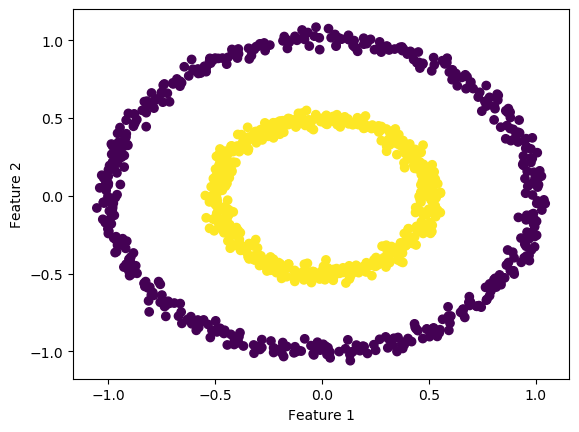

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

We observe a scatter plot with points colored based on their labels. `X[:,0]` and `X[:,1]` refer respectively to the first and second feature.

The resulting plot should show a circle inside another circle, with points in the inner circle belonging to one class and points in the outer circle belonging to the other class.

#### 1.4. Specify whether or not this dataset is linearly separable

This dataset requires a non-linear function to seperate its classes.

The dataset generated by `make_circles` consists of two concentric circles, which cannot be seperated using a linear function.

Simply put, a straight line cannot be drawn to seperate the two classes. However a curve or a more complex shape can be used to do so.

#### 1.5. Tensoring the dataset

For the rest of the lab, to work with PyTorch, we need to convert our NumPy arrays to PyTorch tensors. This can be done thanks to `torch.from_numpy()` torch method. 

In [8]:
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#### 1.6. Splitting the dataset into training and testing sets

We want to split the data into a training set and a test set with a ratio of 80:20 using `train_test_split()`.

As the repartition occurs randomly between the data, we will also set the random state value to 42 so that the repartition is reproducible.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The resulting variables X_train, X_test, y_train, and y_test contain the training and test sets respectively.

### Part 2 · Model Definition
#### 2.0. Architecture
![](https://i.imgur.com/xawWV8N.png)

Next, we will design this FCNN using the PyTorch framework.

#### 2.1. Model implementation using PyTorch

PyTorch is an open source deep learning framework developed by Meta's AI Research team. It is known for its flexibility, ease of use, and speed. PyTorch uses a dynamic computational graph, which allows for more flexibility when building and modifying models.

It integrates well with NumPy, making it easy to manipulate and preprocess data. PyTorch also provides a range of pre-built neural network modules and loss functions, as well as an autograd system for efficient backpropagation and gradient-based optimization.

Additionally, PyTorch has a large and active community that provides support and resources for deep learning practitioners.

##### 2.1.1. Choosing the device

Since, we are using PyTorch, we need to specify the device we will be using to train our model. We will use the GPU if it is available, otherwise we will use the CPU.


In [13]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available () else "cpu"

##### 2.1.2. ModelV0 Code adapted to the figure

In [14]:
class ModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # Constructor to define the model architecture
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)
        
    # Forward pass of the data through the model
    def forward(self, x):
        x = torch.relu(self.layer_1(x))
        x = self.layer_2(x)
        return x

This code defines a neural network model called ModelV0 that has two input features, one output neuron, and a hidden layer with five neurons.

In the __init__ method, we define the layers of the network using the nn.Linear class. We initialize the first layer with two input features and five output neurons, and the second layer with five input neurons and one output neuron.

In the forward method, we pass the input x through the first layer using the ReLU activation function and then pass the result through the second layer to obtain the output.

##### 2.1.3. Instantiating the model

In [15]:
model_0 = ModelV0().to(device)

##### 2.1.4. Showing the layers of the model
We can simply print out the instance of `ModelV0` we just created. It will display information about all of its sub-modules/layers as well as any of the parameters they might contain...

In [16]:
print(model_0)

ModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)


#### 2.2. How to choose input/output dimensions of the classifier

In general, the input dimensions are determined by the shape of the input data, while the output dimensions are determined by the number of classes in the classification task.

In the case of our binary classification problem, we had two input features (corresponding to the x and y coordinates of the data points) and one output (corresponding to the predicted class label, either 0 or 1).

#### 2.3. Why does the first layer in the model have 5 hidden units (neurons) which transform the input data of 2 features into 5 features?

Increasing the number of hidden units in a layer allows the neural network to learn more complex and abstract representations of the input data.

In this case, transforming the 2 input features into 5 features can help the network better capture the underlying patterns and relationships in the data, and improve its ability to classify the input samples accurately.

However, adding more hidden units also increases the complexity of the network, and may lead to overfitting if not properly regularized; which leads us to the next question.

#### 2.4. How to choose the number of neurons per hidden layer?

There is no exact way to precisely determine the number of neurons per hidden layer at once. It generally a trial and error process, where you try different numbers of neurons and see which one works best for your problem.

A rule of thumb is to start with a smaller number of neurons and gradually increase until the desired level of performance is achieved or until the model begins to overfit.

One must mind also that few neurons per layer could result in underfitting and poor performance on the other hand.

#### 2.5. Why does layer 2 have 5 input features?

The second layer has 5 input features because it receives the transformed features from the first layer which has 5 output features. This allows for more complex representations of the input data to be learned, leading to better classification performance.

#### 2.6. Define the loss function (binary cross-entropy) and the optimizer (Stochastic Gradient Descent with a learning rate of 0.1) for the FCNN.

In [17]:
loss_fn = nn.BCEWithLogitsLoss() # Binary Cross Entropy Loss
optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.1) # Stochastic Gradient Descent

#### 2.7. PyTorch has two implementations of binary cross-entropy loss. Explain the difference between these two methods: `torch.nn.BCELoss()` and `torch.nn.BCEWithLogitsLoss()`.

Both `BCELoss()` and `BCEWithLogitsLoss()` are binary cross-entropy loss functions in PyTorch. The main difference between the two is that `BCEWithLogitsLoss()` combines a sigmoid layer and binary cross-entropy loss into a single function, which is more numerically stable and efficient than using them separately.

In other words, `BCEWithLogitsLoss()` takes in the raw output logits from the model and applies the sigmoid function and binary cross-entropy loss at the same time, while `BCELoss()` assumes that the inputs are already passed through a sigmoid activation function. Therefore, `BCEWithLogitsLoss()` is generally preferred over `BCELoss()`.

### Part 3 · Model Training

#### 3.1. Train the model on 100 epochs and show model progress each 10 epochs
##### 3.1.1. + 3.1.3. + 3.1.4. Well comment the code showing steps to train and evaluate such model

In [19]:
def train(model, data_loader, loss_fn, optimizer, device):
    # Set the model to train mode
    model.train()
    
    # Initialize the loss and accuracy
    total_loss = 0.0
    total_correct = 0
    
    # Loop over the batches in the data loader
    for X, y in data_loader:
        # Move the data to the device
        X = X.to(device)
        y = y.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        
        # Backward pass and optimization step
        loss.backward()
        optimizer.step()
        
        # Update the loss and accuracy
        total_loss += loss.item() * X.shape[0]
        total_correct += (y_pred.round() == y).sum().item()
    
    # Compute the average loss and accuracy
    avg_loss = total_loss / len(data_loader.dataset)
    avg_acc = total_correct / len(data_loader.dataset)
    
    return avg_loss, avg_acc


In [20]:
def evaluate(model, data_loader, loss_fn, device):
    # Set the model to eval mode
    model.eval()
    
    # Initialize the loss and accuracy
    total_loss = 0.0
    total_correct = 0
    
    # Loop over the batches in the data loader
    with torch.no_grad():
        for X, y in data_loader:
            # Move the data to the device
            X = X.to(device)
            y = y.to(device)

            # Forward pass
            y_pred = model(X)
            loss = loss_fn(y_pred, y)

            # Update the loss and accuracy
            total_loss += loss.item() * X.shape[0]
            total_correct += (y_pred.round() == y).sum().item()

    # Compute the average loss and accuracy
    avg_loss = total_loss / len(data_loader.dataset)
    avg_acc = total_correct / len(data_loader.dataset)

    return avg_loss, avg_acc

In [24]:
from torch.utils.data import TensorDataset, DataLoader

# create TensorDatasets
train_data = TensorDataset(X_train, y_train.unsqueeze(1))
test_data = TensorDataset(X_test, y_test.unsqueeze(1))

# create DataLoaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

# Define number of epochs
num_epochs = 100

# Train the model for 100 epochs
for epoch in range(num_epochs):
    # Train the model on the training set
    train_loss, train_acc = train(model_0, train_loader, loss_fn, optimizer, device)
    
    # Compute the test loss and accuracy
    test_loss, test_acc = evaluate(model_0, test_loader, loss_fn, device)
    
    # Print the progress every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

Epoch [10/100], Train Loss: 0.6545, Train Acc: 0.5050, Test Loss: 0.6587, Test Acc: 0.4800
Epoch [20/100], Train Loss: 0.6051, Train Acc: 0.3337, Test Loss: 0.6130, Test Acc: 0.3300
Epoch [30/100], Train Loss: 0.5366, Train Acc: 0.3488, Test Loss: 0.5516, Test Acc: 0.3500
Epoch [40/100], Train Loss: 0.4443, Train Acc: 0.4425, Test Loss: 0.4620, Test Acc: 0.4250
Epoch [50/100], Train Loss: 0.3273, Train Acc: 0.4713, Test Loss: 0.3400, Test Acc: 0.6050
Epoch [60/100], Train Loss: 0.2254, Train Acc: 0.3488, Test Loss: 0.2326, Test Acc: 0.3900
Epoch [70/100], Train Loss: 0.1567, Train Acc: 0.1462, Test Loss: 0.1609, Test Acc: 0.1450
Epoch [80/100], Train Loss: 0.1125, Train Acc: 0.0512, Test Loss: 0.1165, Test Acc: 0.0450
Epoch [90/100], Train Loss: 0.0842, Train Acc: 0.0100, Test Loss: 0.0874, Test Acc: 0.0000
Epoch [100/100], Train Loss: 0.0654, Train Acc: 0.0013, Test Loss: 0.0685, Test Acc: 0.0000


**Few Interpretations**:

The model's performance is poor, with the training accuracy and loss improving slightly but the testing accuracy and loss remaining relatively constant. This suggests that the model is not able to generalize well to new data and is likely overfitting to the training data. Overall, the model needs to be improved or adjusted to perform better on new and unseen data.

##### 3.1.2. Write the function that calculates the classification accuracy.

In [25]:
def accuracy_fn(y_true, y_pred):
    y_pred = torch.round(torch.sigmoid(y_pred))
    correct = (y_pred == y_true).sum().item()
    total = len(y_true)
    accuracy = correct / total
    return accuracy

# it was built into the code previously, not a seperate function, but here is its code anyways!

- We take the true labels y_true and the predicted labels y_pred as inputs.
- We first apply the sigmoid function to the predicted values and then round them to the nearest integer (0 or 1), since our output is a single binary value.
- We then compare the predicted labels with the true labels to count the number of correct predictions.
- Finally, we divide the number of correct predictions by the total number of examples to get the accuracy.

### Part 4 · Model Evaluation


#### 4.1. Plot the decision boundary for the training and test sets.
The decision boundary refers to the boundary or surface that separates the different classes in the classification problem.

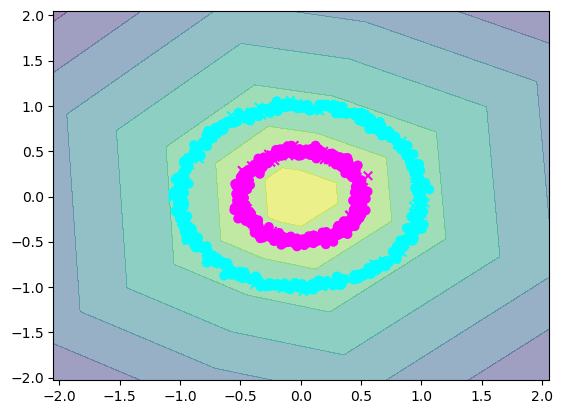

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a grid of points to plot the decision boundary
xx, yy = np.meshgrid(np.arange(X_train[:,0].min() - 1, X_train[:,0].max() + 1, 0.01),
                     np.arange(X_train[:,1].min() - 1, X_train[:,1].max() + 1, 0.01))
grid = np.c_[xx.ravel(), yy.ravel()].astype(np.float32)

# Move the grid to the same device as the model (GPU or CPU)
device = next(model_0.parameters()).device
grid = torch.Tensor(grid).to(device)

# Get the model's predictions on the grid
with torch.no_grad():
    model_0.eval()
    Z = model_0(grid).cpu().numpy()[:,]

# Reshape the predictions into a grid
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the training/test data points
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='cool')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='cool', marker='x')
plt.show()


The different colors represent the different decision regions that the model has learned to classify the input data into. The colors indicate the probability of a point belonging to a certain class, with different shades of a color representing different levels of probability. The decision boundary is the boundary line that separates the decision regions of different classes.

#### 4.2. What is the problem with the model?

The model's performance is poor, with the training accuracy and loss improving slightly but the testing accuracy and loss remaining relatively constant. This suggests that the model is not able to generalize well to new data and is likely overfitting to the training data. Overall, the model needs to be improved or adjusted to perform better on new and unseen data.

#### 4.3. How to improve the model? List 6 possible ways you know:

- Increase the size of the training dataset: A larger dataset can help the model to learn more complex patterns and improve its accuracy.

- Use data augmentation: Data augmentation involves generating new training examples from the existing ones by applying various transformations such as rotation, flipping, and scaling. This technique can help to increase the diversity of the training data and improve the model's ability to generalize.

- Use a more complex model: A more complex model such as a deep neural network with more layers and neurons can help to capture more complex patterns in the data and improve the model's accuracy.

- Tune hyperparameters: Hyperparameters such as learning rate, batch size, and regularization strength can have a significant impact on the performance of the model. Tuning these hyperparameters can help to find the optimal values for the model.

- Use transfer learning: Transfer learning involves using a pre-trained model as a starting point and fine-tuning it on a new dataset. This technique can help to leverage the knowledge learned by the pre-trained model and improve the performance of the new model.

- Ensemble learning: Ensemble learning involves combining the predictions of multiple models to improve the overall performance. This technique can help to reduce the risk of overfitting and improve the robustness of the model.

## Lab Conclusion

What we learnt:

- How to implement a fully connected neural network in PyTorch.
- How to train and evaluate a fully connected neural network on a binary classification problem.
- How to visualize the decision boundary of a fully connected neural network.
- How to improve the performance of a fully connected neural network.